<a href="https://colab.research.google.com/github/zhirongwang94/csm148/blob/main/final_project/finallllll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is the final project. 
Background:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

# Helper Classes and Functions





In [31]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from matplotlib import pyplot
import itertools

%matplotlib inline

class DoesNothingScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        super().__init__()

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X

In [32]:
# Helper funct
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
def draw_results(X_test, y_test, classifier_model):
  y_true = y_test;
  y_pred = classifier_model.predict(X_test)


  scores = precision_recall_fscore_support(y_true, y_pred, average='binary')
  f1 = f1_score(y_true, y_pred, average='binary')

  print("accuracy: ", classifier_model.score(X_test, y_test))
  print("precision: ", scores[0])
  print("recall: ", scores[1])
  print("f1_score: ", f1)
  print("confusion matrix: ", confusion_matrix(y_true, y_pred))
  draw_confusion_matrix(y_true, y_pred, ['-', '+'])

In [33]:
# Helper function that allows you to draw nicely formatted confusion matrices
import matplotlib.pyplot as plt
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# Part 1. Load the Data



In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
!ls ./gdrive/MyDrive/datasets/stroke

 dataset-stroke.csv  'dataset-stroke(old).csv'


In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

csv_path = './gdrive/MyDrive/datasets/stroke/dataset-stroke.csv'
stroke = pd.read_csv(csv_path)

stroke.head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2458,Female,78.0,0,0,Yes,Private,Rural,235.63,32.3,never smoked,1
96,35512,Female,70.0,0,0,Yes,Self-employed,Rural,76.34,24.4,formerly smoked,1
97,56841,Male,58.0,0,1,Yes,Private,Rural,240.59,31.4,smokes,1
98,8154,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1


# Part2 Data Analysis and Imputation

In [37]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [38]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [39]:
# .info() result shows there are some row in bmi has 95 Nah value
# let check if they have there 'Unknown' values in smoking_staus. 
stroke[stroke['smoking_status'] == 'Unknown']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9.0,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f256fc124d0>,
      dtype=object)

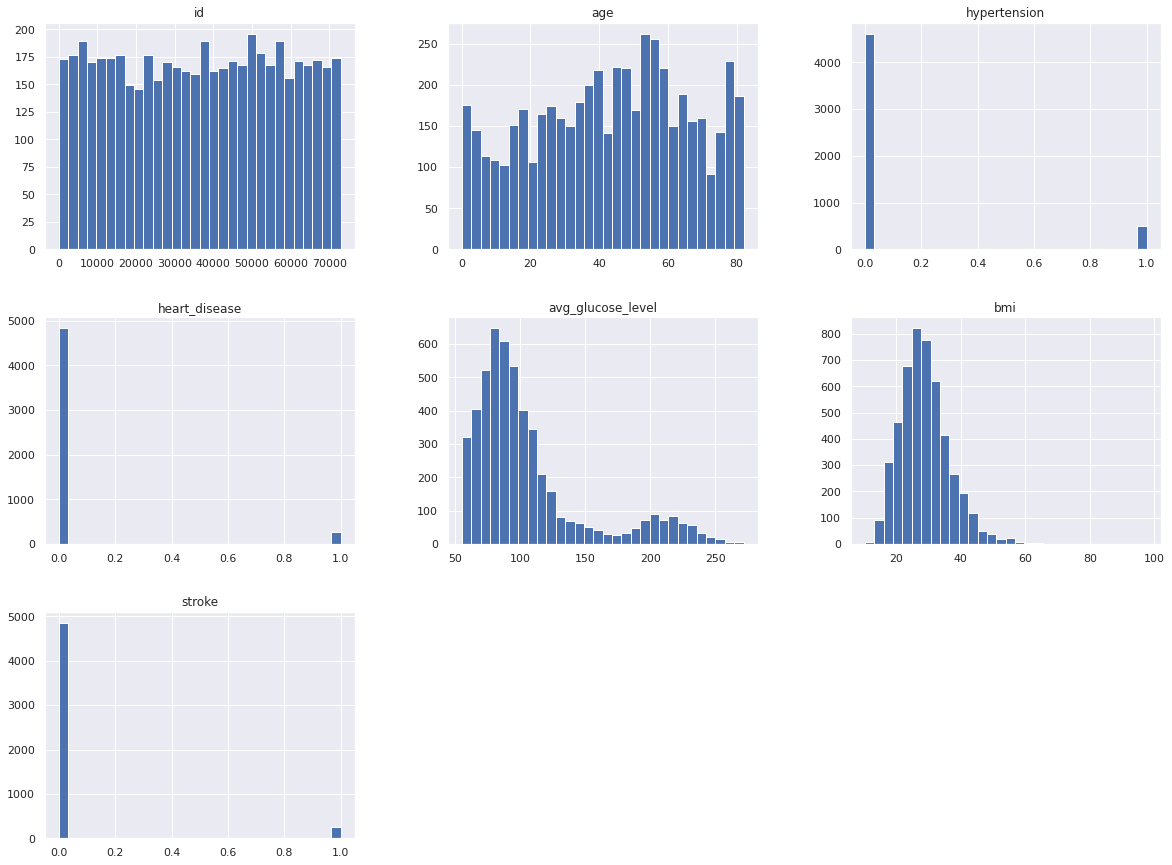

In [40]:

stroke.hist(bins=30, figsize=(20,15))

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


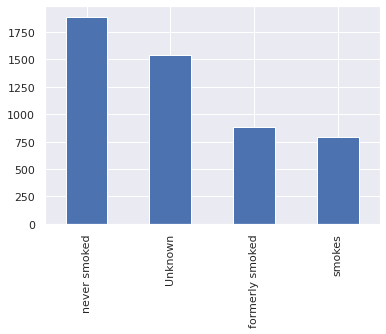

In [41]:
print(stroke['smoking_status'].value_counts())
stroke['smoking_status'].value_counts().plot(kind='bar')

Since the observation of 'Unknown' smoking_status is a large portion of the total, we don't want to replace the 'Unknown' value with any other values by guessing. As smoking status has is a significant effect to other health issue, we don't want to remove the whole column. Thus, we want to remove observation with 'Unknown' smoking status. 

In [42]:
stroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [43]:
# drop row with 'Unknown' value in the 'smoking_status' column. 
row_has_Unknown = stroke[stroke['smoking_status']== 'Unknown'].any(axis=1)
row_has_Unknown.index

stroke = stroke.drop(row_has_Unknown.index, axis=0)


# drop smoking row 
# stroke.drop(['smoking_status'], axis=1)

# map smoking_status to int 
# stroke['smoking_status'] = stroke['smoking_status'].map({'smokes':2,
#                               'formerly smoked':1,
#                               'never smoked': 0
# })
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


There are still 140 observation with Nah values in 'bmi' column, before doing imputation, we visualize the distribution of this column from the histgram above and the heatmap below. We know that the correlation betweeen 'bmi' and the label is not strong. In 'bmi', we choose mean for the imputation strategy. 

In [44]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
stroke.corr()


# Heatmap analysis: From the heatmap, we know that the correlation between aga and most featurees are significant.
# Thus, we want to drop the age column when we do the logistic regression.  

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,-0.000581,0.000898,0.013567,0.000915,-0.003862,-0.002587
age,-0.000581,1.000000,0.269664,0.264300,0.232698,0.079666,0.250794
hypertension,0.000898,0.269664,1.000000,0.105633,0.164568,0.132635,0.134717
heart_disease,0.013567,0.264300,0.105633,1.000000,0.148222,0.001288,0.129346
avg_glucose_level,0.000915,0.232698,0.164568,0.148222,1.000000,0.156404,0.128714
bmi,-0.003862,0.079666,0.132635,0.001288,0.156404,1.000000,0.011673
stroke,-0.002587,0.250794,0.134717,0.129346,0.128714,0.011673,1.000000


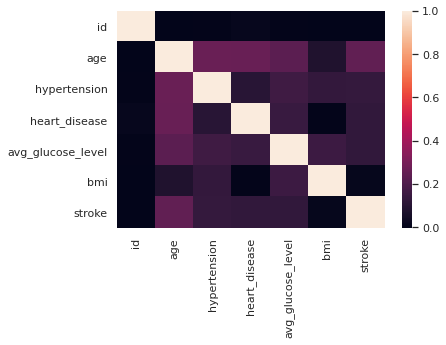

In [45]:
sns.heatmap(stroke.corr())

In [46]:
# categorical_features = ['work_type', 'gender', 'ever_married', 'Residence_type']
# numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status']

stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3566 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3566 non-null   int64  
 1   gender             3566 non-null   object 
 2   age                3566 non-null   float64
 3   hypertension       3566 non-null   int64  
 4   heart_disease      3566 non-null   int64  
 5   ever_married       3566 non-null   object 
 6   work_type          3566 non-null   object 
 7   Residence_type     3566 non-null   object 
 8   avg_glucose_level  3566 non-null   float64
 9   bmi                3426 non-null   float64
 10  smoking_status     3566 non-null   object 
 11  stroke             3566 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 362.2+ KB


# Part3 Data preprocess, and PCA

In [47]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

# augmentation
stroke['hypertension_per_bmi'] = stroke['hypertension']/stroke['bmi']

categorical_features = ['work_type', 'gender', 'ever_married', 'Residence_type', 'smoking_status']
numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','hypertension_per_bmi', ]


num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ('nor_scaler', Normalizer())
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, numerical_features ),                                  
        ("cat", OneHotEncoder(), categorical_features),
    ])

stroke_prepared = full_pipeline.fit_transform(stroke)
stroke_target = stroke['stroke']

stroke_prepared


array([[ 0.20152408, -0.07924017,  0.80191998, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.30335719, -0.17820471, -0.12318372, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.3919218 , -0.08978371,  0.90862179, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.74641275, -0.16567331, -0.11452141, ...,  0.        ,
         1.        ,  0.        ],
       [-0.68017891, -0.35031037, -0.24215147, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07708259, -0.25627588, -0.17715028, ...,  1.        ,
         0.        ,  0.        ]])

In [48]:
from sklearn.model_selection import train_test_split
data_target = stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(stroke_prepared, stroke_target, test_size=0.3, random_state=42, shuffle=True)


X_train.shape

(2496, 21)

Use PCA to simplilize data

In [49]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

pca.fit(X_train)
stroke_PCA = pca.fit_transform(stroke_prepared)
X_train_PCA  = pca.fit_transform(X_train)
X_test_PCA = pca.fit_transform(X_test)
print("Variance Ratio: ", pca.explained_variance_ratio_)

Variance Ratio:  [0.16422742 0.15213583 0.13285081 0.10472788 0.09418987 0.07142337
 0.06849017 0.05785318 0.04863729 0.04378966]


# Part4  Basic Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:  0.9373831775700935
precision:  0.0
recall:  0.0
f1_score:  0.0
confusion matrix:  [[1003    0]
 [  67    0]]


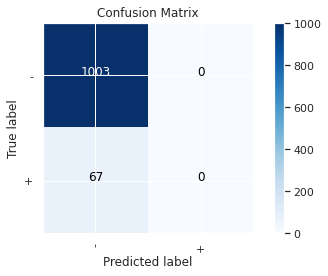

In [50]:
# Basic Logistic Regression without standalization 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


log_clf = LogisticRegression(random_state=0, max_iter=1000) 
log_clf.fit(X_train, y_train)
log_clf.score(X_test, y_test)
draw_results(X_test, y_test, log_clf) 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:  0.9373831775700935
precision:  0.0
recall:  0.0
f1_score:  0.0
confusion matrix:  [[1003    0]
 [  67    0]]


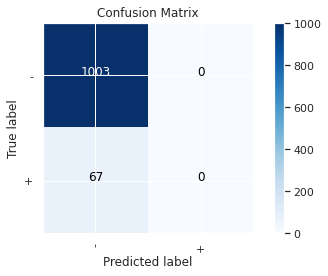

In [51]:
# PCA + Logistic Regression 
import numpy as np
from sklearn.decomposition import PCA


log_clf = LogisticRegression(random_state=0,) 
log_clf.fit(X_train_PCA, y_train)
log_clf.score(X_test_PCA, y_test)
# pca.explained_variance_ratio_

draw_results(X_test_PCA, y_test, log_clf) 


# Part5 Neural Network

accuracy:  0.9242990654205607
precision:  0.1111111111111111
recall:  0.029850746268656716
f1_score:  0.047058823529411764
confusion matrix:  [[987  16]
 [ 65   2]]


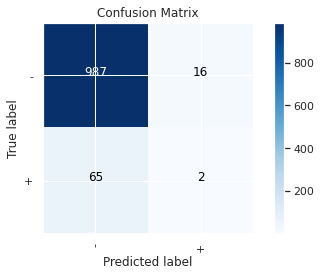

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

NN_clf = MLPClassifier(random_state=1, max_iter=1500).fit(X_train, y_train)
NN_clf.score(X_test, y_test)
draw_results(X_test, y_test, NN_clf) 

# Part6 Bagging

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:  0.9373831775700935
precision:  0.0
recall:  0.0
f1_score:  0.0
confusion matrix:  [[1003    0]
 [  67    0]]


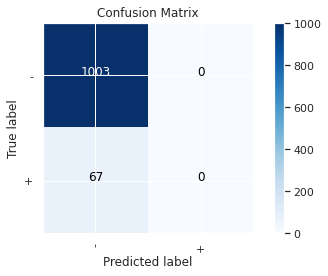

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:  0.9373831775700935
precision:  0.0
recall:  0.0
f1_score:  0.0
confusion matrix:  [[1003    0]
 [  67    0]]


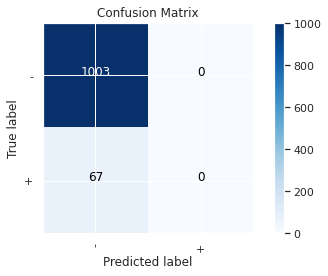

accuracy:  0.9355140186915888
precision:  0.25
recall:  0.014925373134328358
f1_score:  0.028169014084507043
confusion matrix:  [[1000    3]
 [  66    1]]


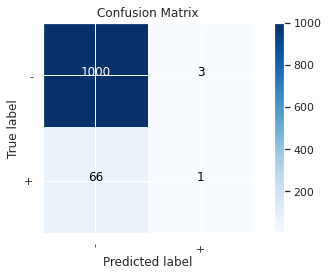

accuracy:  0.9336448598130841
precision:  0.16666666666666666
recall:  0.014925373134328358
f1_score:  0.027397260273972605
confusion matrix:  [[998   5]
 [ 66   1]]


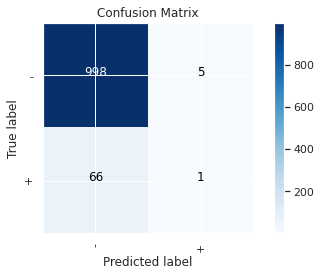

In [53]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

# Logistic Regression + Bagging
bagging_logReg_clf = BaggingClassifier(log_clf, n_estimators=10, random_state=0).fit(X_train, y_train)
draw_results(X_test, y_test, bagging_logReg_clf) 

# Logistic Regression + PCA + Bagging
bagging_logReg_clf = BaggingClassifier(log_clf, n_estimators=10, random_state=0).fit(X_train_PCA, y_train)
draw_results(X_test_PCA, y_test, bagging_logReg_clf) 


# Neural Network + Bagging 
bagging_NN_clf = BaggingClassifier(NN_clf, n_estimators=10, random_state=0).fit(X_train, y_train)
draw_results(X_test, y_test, bagging_NN_clf) 

# Neural Network + PCA + Bagging 
bagging_NN_clf = BaggingClassifier(NN_clf, n_estimators=10, random_state=0).fit(X_train_PCA, y_train)
draw_results(X_test_PCA, y_test, bagging_NN_clf) 

# Part8 Cross Validation

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:  0.9424964936886395
precision:  0.0
recall:  0.0
f1_score:  0.0
confusion matrix:  [[672   0]
 [ 41   0]]


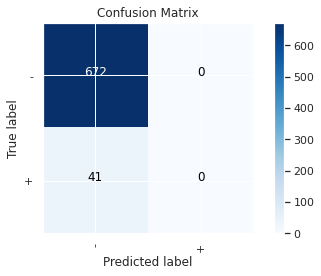

Basic Logistic Regression Accuracy:  0.9433537229758663


In [54]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

# Cross Validataion for Basic Logistic Regression 
kf = KFold(n_splits=5, random_state=None, shuffle=True)

X = stroke_prepared;
y = stroke['stroke'].to_numpy()
results = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = log_clf
  clf.fit(X_train, y_train)
  results.append(clf.score(X_test, y_test))
  # print(clf.score(X_test, y_test))

draw_results(X_test, y_test, clf)  
print("Basic Logistic Regression Accuracy: ", np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:  0.9396914446002805
precision:  0.0
recall:  0.0
f1_score:  0.0
confusion matrix:  [[670   0]
 [ 43   0]]


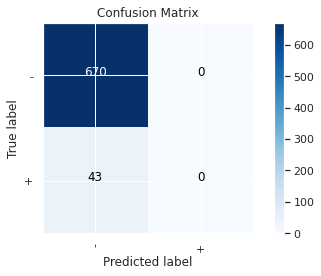

Logistic Regression + Bagging Accuracy:  0.9433552944319382


In [55]:

# Cross Validataion for Logistic Regression + Bagging 
kf = KFold(n_splits=5, random_state=None, shuffle=True)

X = stroke_prepared;
y = stroke['stroke'].to_numpy()
results = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = bagging_logReg_clf
  clf.fit(X_train, y_train)
  results.append(clf.score(X_test, y_test))
  # print(clf.score(X_test, y_test))
  
draw_results(X_test, y_test, clf)
print("Logistic Regression + Bagging Accuracy: ", np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:  0.9278557114228457
precision:  0.0
recall:  0.0
f1_score:  0.0
confusion matrix:  [[463   0]
 [ 36   0]]


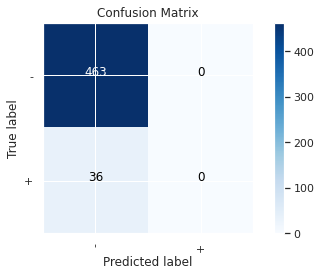

Logistic Regression + PCA + Bagging Accuracy:  0.9190613226452905


In [56]:
# Cross Validataion for Logistic Regression + PCA + Bagging 
kf = KFold(n_splits=5, random_state=None, shuffle=True)

X = X_train_PCA;
y = stroke['stroke'].to_numpy()
results = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = bagging_logReg_clf
  clf.fit(X_train, y_train)
  results.append(clf.score(X_test, y_test))
  # print(clf.score(X_test, y_test))

draw_results(X_test, y_test, clf)
print("Logistic Regression + PCA + Bagging Accuracy: ", np.mean(results))

accuracy:  0.9340813464235624
precision:  0.2857142857142857
recall:  0.045454545454545456
f1_score:  0.0784313725490196
confusion matrix:  [[664   5]
 [ 42   2]]


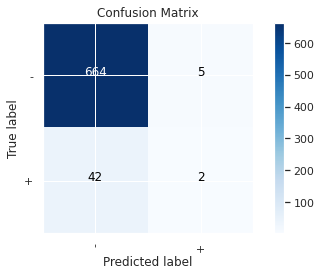

Neural Network:  0.934661213714097


In [57]:
# Cross Validataion for Neural Network  
kf = KFold(n_splits=5, random_state=None, shuffle=True)
X = stroke_prepared;
y = stroke['stroke'].to_numpy()
results = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = NN_clf
  clf.fit(X_train, y_train)
  results.append(clf.score(X_test, y_test))
  # print(clf.score(X_test, y_test))
  # draw_results(X_test, y_test, clf)

draw_results(X_test, y_test, clf)
print("Neural Network: ", np.mean(results))

accuracy:  0.9551192145862553
precision:  0.3333333333333333
recall:  0.06666666666666667
f1_score:  0.1111111111111111
confusion matrix:  [[679   4]
 [ 28   2]]


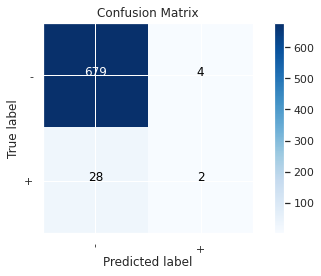

Neural Network:  0.9363438503030945


In [59]:
# Cross Validataion for Neural Network + PCA
kf = KFold(n_splits=5, random_state=None, shuffle=True)
X = stroke_PCA;
y = stroke['stroke'].to_numpy()
results = []
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf = NN_clf
  clf.fit(X_train, y_train)
  results.append(clf.score(X_test, y_test))
  # print(clf.score(X_test, y_test))
  # draw_results(X_test, y_test, clf)

draw_results(X_test, y_test, clf)
print("Neural Network: ", np.mean(results))

# My chosen Model 


accuracy:  0.9336448598130841
precision:  0.16666666666666666
recall:  0.014925373134328358
f1_score:  0.027397260273972605
confusion matrix:  [[998   5]
 [ 66   1]]


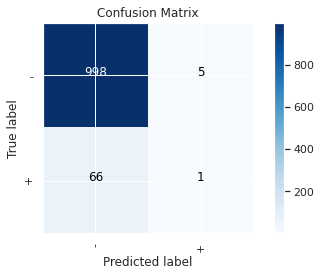

In [60]:


X_train, X_test, y_train, y_test = train_test_split(stroke_prepared, stroke_target, test_size=0.3, random_state=42, shuffle=True)


# Neural Network + PCA + Bagging 
bagging_NN_clf = BaggingClassifier(NN_clf, n_estimators=10, random_state=0).fit(X_train_PCA, y_train)
draw_results(X_test_PCA, y_test, bagging_NN_clf) 